In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv")
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
2457,6387,city_160,0.920,NaN,Has relevent experience,no_enrollment,Graduate,Business Degree,9.0,NaN,NaN,34.0,0.0
12973,30853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16.0,NaN,NaN,10.0,1.0
15174,3872,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,100-500,Pvt Ltd,18.0,0.0
13171,21478,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,Other,5.0,NaN,NaN,NaN,1.0
1026,30558,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,7.0,100-500,Funded Startup,53.0,1.0


In [3]:
df.shape

(19158, 13)

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [5]:
19158 * 1/20  #5 percentage

957.9

In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [10]:
cols = [col for col in df.columns if df[col].isnull().mean()*100 < 5 and df[col].isnull().mean()*100 >0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [24]:
tdf = df[cols]

In [25]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18679 non-null  float64
 1   enrolled_university     18772 non-null  object 
 2   education_level         18698 non-null  object 
 3   experience              19093 non-null  float64
 4   training_hours          18392 non-null  float64
dtypes: float64(3), object(2)
memory usage: 748.5+ KB


In [32]:
num_cols = tdf.select_dtypes(np.number).columns.tolist()
num_cols

['city_development_index', 'experience', 'training_hours']

In [33]:
cat_cols = tdf.select_dtypes(object).columns.tolist()
cat_cols

['enrolled_university', 'education_level']

In [12]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [13]:
new_df = df[cols].dropna()

In [36]:
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


In [14]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

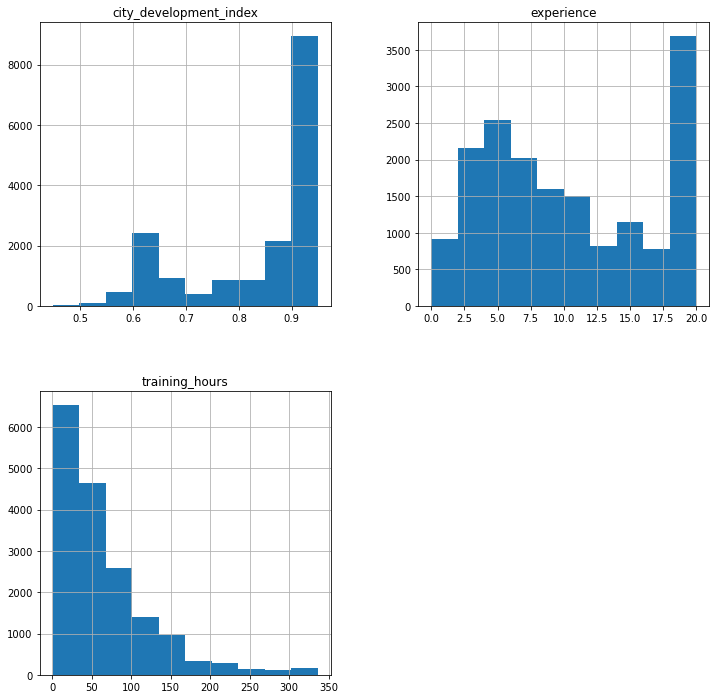

In [16]:
new_df.hist(figsize=(12,12))
plt.show()

### comparision of distributions

## numerical cols

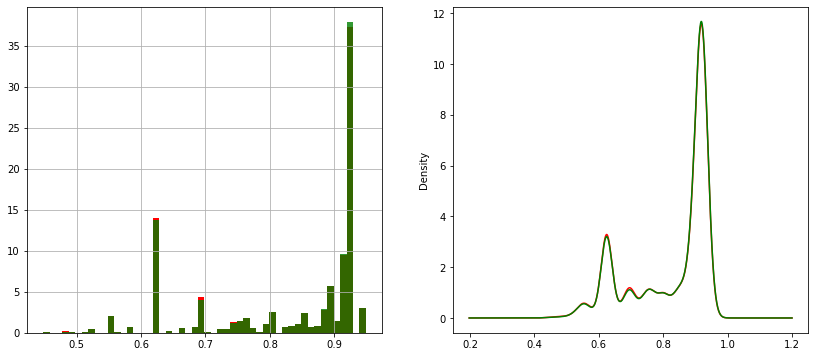

In [56]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(121)

# original data
df[num_cols[0]].hist(bins=50, ax=ax, density=True, color='red')

# data after cca
new_df[num_cols[0]].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


ax = fig.add_subplot(122)

# original data
df[num_cols[0]].plot.density(color='red')

# data after cca
new_df[num_cols[0]].plot.density(color='green')


plt.show()


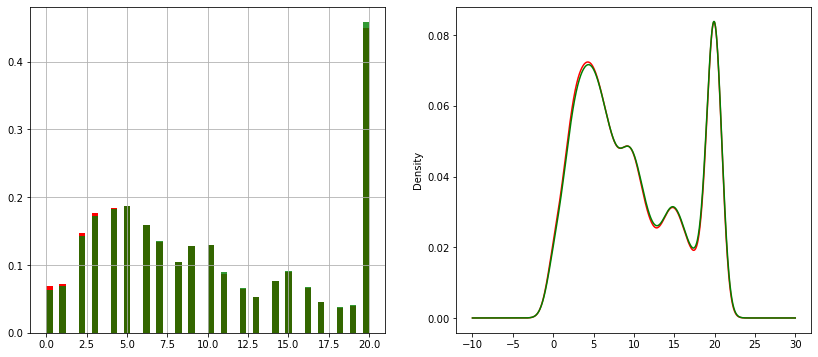

In [57]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(121)

# original data
df[num_cols[1]].hist(bins=50, ax=ax, density=True, color='red')

# data after cca
new_df[num_cols[1]].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


ax = fig.add_subplot(122)

# original data
df[num_cols[1]].plot.density(color='red')

# data after cca
new_df[num_cols[1]].plot.density(color='green')


plt.show()


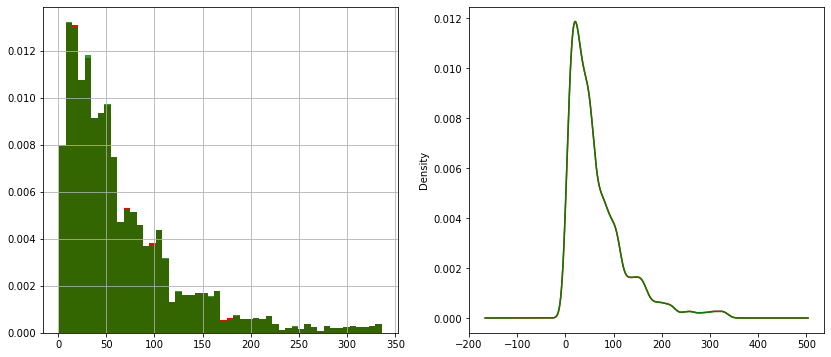

In [58]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(121)

# original data
df[num_cols[2]].hist(bins=50, ax=ax, density=True, color='red')

# data after cca
new_df[num_cols[2]].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


ax = fig.add_subplot(122)

# original data
df[num_cols[2]].plot.density(color='red')

# data after cca
new_df[num_cols[2]].plot.density(color='green')


plt.show()


## categorical cols

In [59]:
temp = pd.concat([
            # percentage of observations per category, original data
            df[cat_cols[0]].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df[cat_cols[0]].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [60]:
temp = pd.concat([
            # percentage of observations per category, original data
            df[cat_cols[1]].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df[cat_cols[1]].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
